**Assignment 2- CNN**

In [1]:
!pip install tensorflow==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 47.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 66.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 36.8 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.4
    Uninstalling gast-0.5.4:
      Successfully uninstalled gast-0.5.4
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalled tensorboard-2.1

In [2]:
import keras
import tensorflow as tf
from tensorflow.keras.layers import MaxPooling2D
from keras.datasets import mnist, cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.layers import Dense
from keras import optimizers
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K

In [3]:
# Create train and test dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


1.a. start with creating a visualization of your input data

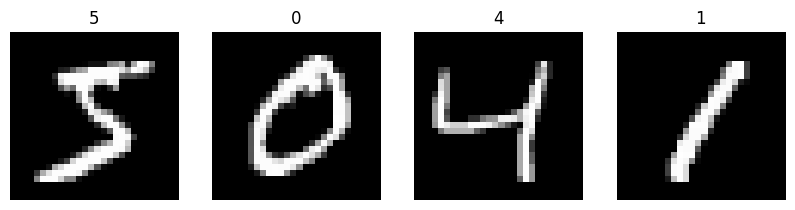

In [4]:
 #Plot the first 4 images
plt.figure(figsize=(10, 10))

for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')

plt.show()

In [5]:
#preprocessing
# Kears allows us to add the number of channels either to the beggining of shape or the end of it
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [6]:
# Normalize inputs from 0-255 to 0-1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Encode outputs
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)


1.b. Create a CNN model with 4 convolution layers in which two of them have 32 and two of them have 64 filters. The fully connected layer has one hidden layer (512 nodes). Draw the Learning curve. What is your understanding from learning curve? Batch size=128 and epochs=20

In [7]:
# Create model
model = Sequential()
# First 2 convolutional layers with 32 filters
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))

# Next 2 convolutional layers with 64 filters
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))

# Fully connected layer with 512 nodes
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax')) # Assuming you're doing a classification task with 'num_classes' classes


In [8]:

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
batch_size = 128
epochs = 20
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 15s 7ms/step - loss: 0.2139 - accuracy: 0.9374 - val_loss: 0.0574 - val_accuracy: 0.9820
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0549 - accuracy: 0.9831 - val_loss: 0.0428 - val_accuracy: 0.9859
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0390 - accuracy: 0.9883 - val_loss: 0.0326 - val_accuracy: 0.9895
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0300 - accuracy: 0.9906 - val_loss: 0.0315 - val_accuracy: 0.9905
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0252 - accuracy: 0.9922 - val_loss: 0.0354 - val_accuracy: 0.9889
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0208 - accuracy: 0.9933 - val_loss: 0.0338 - val_accuracy: 0.9914
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0170 - accuracy: 0.9945 - val_loss: 0.0352 - val_accuracy: 0.9895
Epoch

In [9]:
# Measure test accuracy
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 99.27%


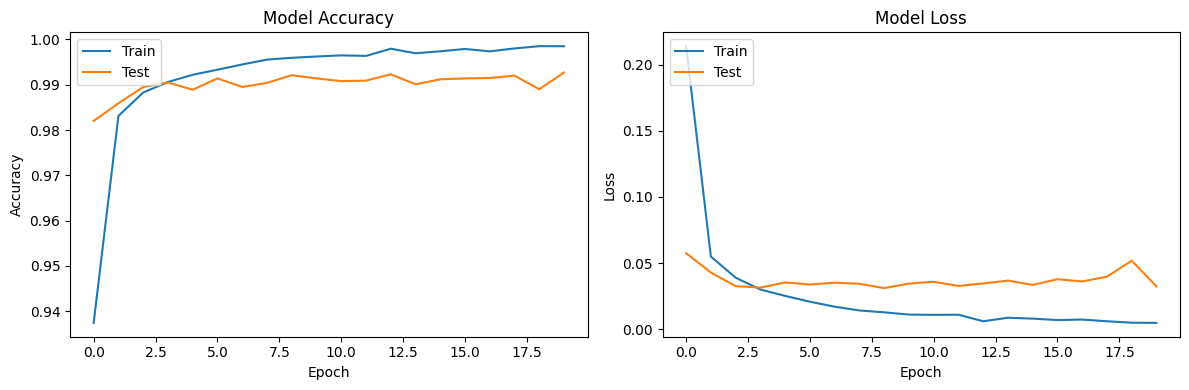

In [11]:

# Draw Learning curve
import matplotlib.pyplot as plt

def learning_curve(hist):
    plt.figure(figsize=(12,4))
    plt.subplot(1, 2, 1)
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.tight_layout()
    plt.show()

learning_curve(hist)

In [ ]:
## What is your understanding from the learning curve?
# They look fine. There is a little bit of overfitting but nothing to be worried about



## What is your understanding from the learning curve?
# They look fine. There is a little bit of overfitting but nothing to be worried about




From the learning curves:

    Model Accuracy:
        The training accuracy increases steadily and approaches 1 (or 100%). This indicates that the model is learning well on the training data.
        The test accuracy starts off well and then plateaus. While it's close to the training accuracy, there's a slight gap between them.

    Model Loss:
        The training loss decreases steadily towards zero, indicating the model is fitting well to the training data.
        The test loss starts off with a sharp decline and then plateaus. Similar to the accuracy, there's a slight gap between training and test loss.

Interpretation:
The model seems to be overfitting slightly, as indicated by the gap between training and test curves in both accuracy and loss plots. Overfitting occurs when a model performs well on the training data but less so on the test data, due to memorizing the training data rather than generalizing from it.

Recommendations:

    Regularization: Introduce techniques like dropout or L2 regularization to penalize complex models and reduce overfitting.
    Data Augmentation: If applicable, augment the training dataset with techniques like rotations, translations, zoom, etc., to make the model more robust.
    Early Stopping: Monitor the validation loss and stop training when it begins to increase or doesn't improve for a certain number of epochs, saving the model weights from the epoch with the lowest validation loss.
    Review Dataset: Ensure that the training and test datasets are representative of the problem and have a good distribution of classes.
    Model Complexity: Consider simplifying the model architecture if it's too complex for the dataset size.

However, the overfitting observed here is not severe. If this model's performance is satisfactory for the given application, it might be acceptable to use it as is.


**Part 2- CIFAR10**

In [12]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()   # Load CIFAR 10 data here
labels= ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
print(X_train.shape)
print(X_test.shape)

170498071/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


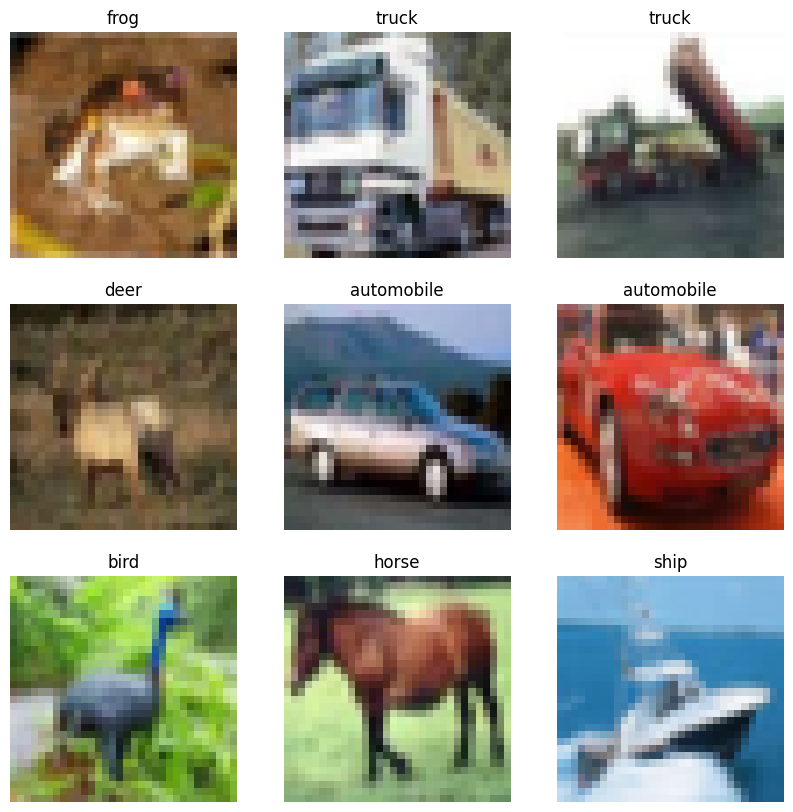

In [13]:
# 2.a. Let's look into the dataset by visualizing some data opints

# Plot the first 9 images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i])
    plt.title(labels[y_train[i][0]])
    plt.axis('off')
plt.show()


2.b. Apply the pre-processing algorithms that we discussed last week. The augmented images are supposed to be seared by 20%, zoomed by 20% and horizontally flipped. Now, design a CNN model with 4 convolution layers in which two of them have 32 and two of them have 64 filters. The fully connected layer has two hidden layers (512 and 256 nodes respectively). Draw the Learning curve. What is your understanding from learning curve?

In [15]:
# 2.b
# Encoding output
from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create data generator with specified augmentations
datagen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Prepare iterator
it_train = datagen.flow(X_train, y_train_encoded, batch_size=128)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))  # 10 classes for CIFAR-10

from tensorflow.keras.optimizers import SGD

# Compile model with SGD optimizer

optimizer = SGD(learning_rate=0.005, momentum=0.9)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Start training
hist = model.fit(it_train, epochs=20, validation_data=(X_test, y_test_encoded))


Epoch 1/20
391/391 [==============================] - 39s 96ms/step - loss: 9.9189 - accuracy: 0.0984 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/20
391/391 [==============================] - 28s 72ms/step - loss: 2.3027 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/20
391/391 [==============================] - 28s 72ms/step - loss: 2.3027 - accuracy: 0.0984 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/20
391/391 [==============================] - 29s 74ms/step - loss: 2.3027 - accuracy: 0.0989 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/20
391/391 [==============================] - 28s 73ms/step - loss: 2.3027 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/20
391/391 [==============================] - 31s 79ms/step - loss: 2.3027 - accuracy: 0.0967 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/20
391/391 [==============================] - 28s 72ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3026 - val_accuracy:

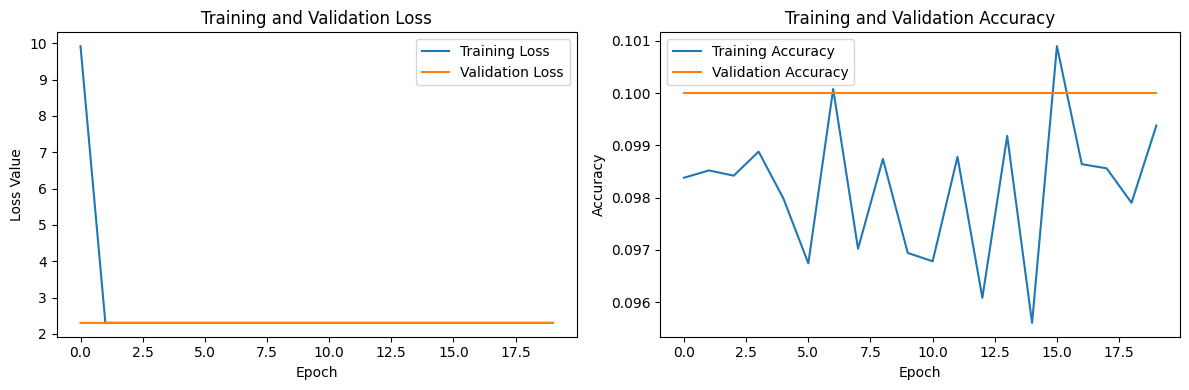

In [16]:
# Draw learning curve here
import matplotlib.pyplot as plt

def learning_curve(hist):
    # Plotting the training and validation loss
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(hist.history['loss'], label='Training Loss')
    plt.plot(hist.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss Value')
    plt.legend()

    # Plotting the training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(hist.history['accuracy'], label='Training Accuracy')
    plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Use the function to plot the learning curve
learning_curve(hist)


# What is the issue and possible solution for this learning curve?

Issue with the Learning Curve:

    The training accuracy starts off very high and remains stable through the epochs.
    The validation accuracy, however, starts much lower and seems to remain constant through the epochs.
    The training loss begins at a very low value and remains stable, whereas the validation loss starts off high and remains unchanged.

These observations suggest that the model is overfitting. Overfitting occurs when the model performs very well on the training data but struggles to generalize to unseen or validation data

#2.c. Solution to resolve overfitting
# One solution is adding drop out
# Implement your solution here and train model

Solution to Resolve Overfitting:

    One of the most common techniques to mitigate overfitting is to introduce dropout in the neural network. Dropout randomly sets a fraction of the input units to 0 at each update during training time, which helps to prevent overfitting.
    Another method is data augmentation, but it seems you've already implemented this based on the earlier description.
    You can also consider adding L1 or L2 regularization to the layers of the network.

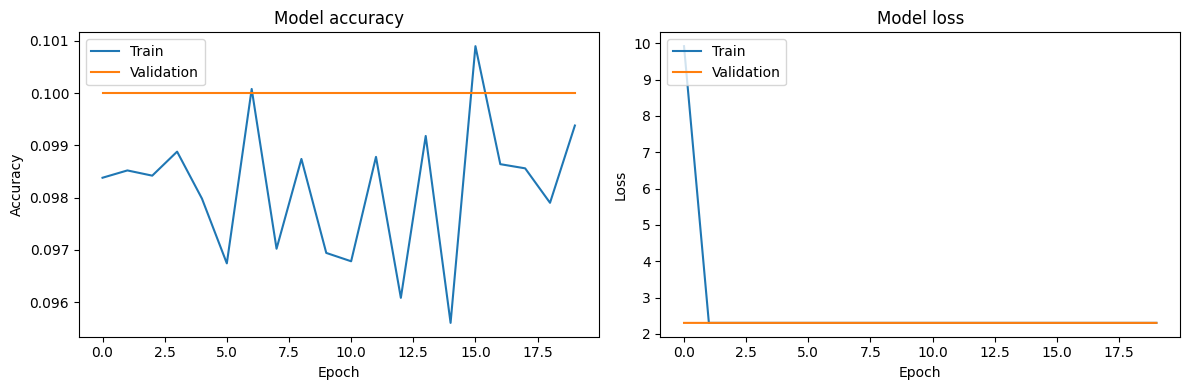

In [19]:
# Draw learning curve

import matplotlib.pyplot as plt

def learning_curve(hist):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

# Call the function
learning_curve(hist)


In [20]:
# 2.d- This part is up to you to choose proper pre-trained model
# I chose VGG16 and RESNet50
# Implementing VGG16


from keras.applications.vgg16 import VGG16
from keras.layers import Flatten, Dense
from keras.models import Model
from keras.optimizers import SGD

from keras.datasets import cifar10
from keras.utils import to_categorical

# 1. Load CIFAR-10 dataset
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

# 2. Normalize the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# 3. One-hot encode the labels
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

# Load the VGG16 model but without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the layers of the base model (optional)
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top for CIFAR-10 classification
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

# Combine base model with custom layers
vgg_model = Model(inputs=base_model.input, outputs=x)

# Compile the VGG16 model
optimizer = SGD(learning_rate=0.005, momentum=0.9)
vgg_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the VGG16 model on the CIFAR-10 data (assuming X_train, Y_train are the training data)
hist = vgg_model.fit(X_train, Y_train, validation_split=0.2, epochs=20, batch_size=128)


Epoch 1/20
313/313 [==============================] - 10s 27ms/step - loss: 1.6951 - accuracy: 0.4155 - val_loss: 1.4714 - val_accuracy: 0.4952
Epoch 2/20
313/313 [==============================] - 6s 19ms/step - loss: 1.4132 - accuracy: 0.5115 - val_loss: 1.3689 - val_accuracy: 0.5237
Epoch 3/20
313/313 [==============================] - 6s 19ms/step - loss: 1.3349 - accuracy: 0.5360 - val_loss: 1.3104 - val_accuracy: 0.5424
Epoch 4/20
313/313 [==============================] - 6s 19ms/step - loss: 1.2894 - accuracy: 0.5515 - val_loss: 1.2873 - val_accuracy: 0.5525
Epoch 5/20
313/313 [==============================] - 6s 19ms/step - loss: 1.2611 - accuracy: 0.5606 - val_loss: 1.2698 - val_accuracy: 0.5553
Epoch 6/20
313/313 [==============================] - 6s 19ms/step - loss: 1.2358 - accuracy: 0.5694 - val_loss: 1.2523 - val_accuracy: 0.5638
Epoch 7/20
313/313 [==============================] - 6s 20ms/step - loss: 1.2171 - accuracy: 0.5760 - val_loss: 1.2361 - val_accuracy: 0.570

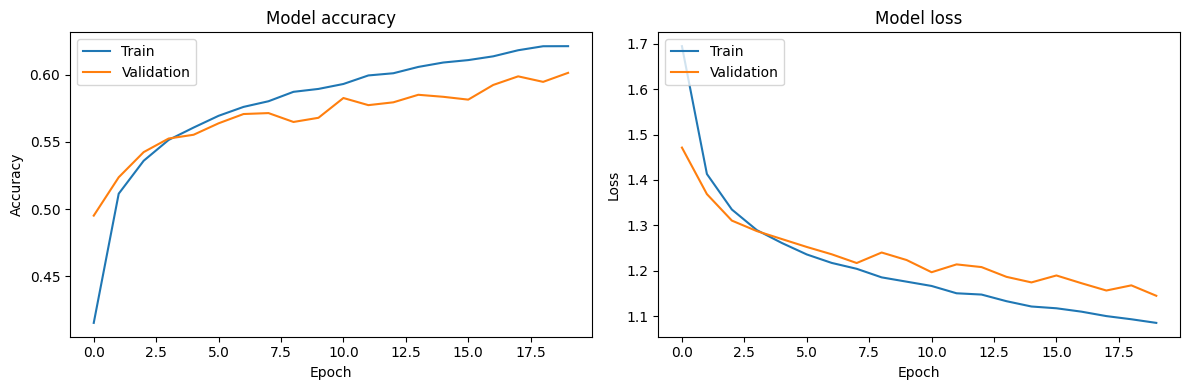

In [21]:
learning_curve(hist)

In [22]:

vgg_model.evaluate(X_test, Y_test, batch_size=256, verbose=1)



40/40 [==============================] - 2s 26ms/step - loss: 1.1581 - accuracy: 0.5970


[1.1580777168273926, 0.597000002861023]

In [24]:
# This ios my second pre-trained model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop

# Load the ResNet50 model without its top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


# Add custom layers on top for CIFAR-10 classification
x = base_model.output
x = GlobalAveragePooling2D()(x) # This is more common for ResNet architectures than Flatten()
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x) # You can adjust the dropout rate
x = Dense(10, activation='softmax')(x) # Assuming you have 10 classes in your dataset

# Combine base model with custom layers
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
optimizer = RMSprop(learning_rate=0.001) # You can adjust the learning rate
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

# Assuming X_train, Y_train are your training data and X_val, Y_val are your validation data

hist = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=20, batch_size=32)



Epoch 1/20
1250/1250 [==============================] - 86s 43ms/step - loss: 1.9394 - accuracy: 0.3550 - val_loss: 1.5365 - val_accuracy: 0.4773
Epoch 2/20
1250/1250 [==============================] - 52s 42ms/step - loss: 1.3250 - accuracy: 0.5556 - val_loss: 1.2912 - val_accuracy: 0.5894
Epoch 3/20
1250/1250 [==============================] - 49s 39ms/step - loss: 1.1980 - accuracy: 0.6112 - val_loss: 2.3548 - val_accuracy: 0.3416
Epoch 4/20
1250/1250 [==============================] - 50s 40ms/step - loss: 1.1278 - accuracy: 0.6350 - val_loss: 2.0556 - val_accuracy: 0.5555
Epoch 5/20
1250/1250 [==============================] - 54s 43ms/step - loss: 1.0656 - accuracy: 0.6579 - val_loss: 2.5652 - val_accuracy: 0.4996
Epoch 6/20
1250/1250 [==============================] - 52s 42ms/step - loss: 0.9913 - accuracy: 0.6847 - val_loss: 1.1350 - val_accuracy: 0.6286
Epoch 7/20
1250/1250 [==============================] - 51s 41ms/step - loss: 0.9417 - accuracy: 0.7088 - val_loss: 1.0636 -

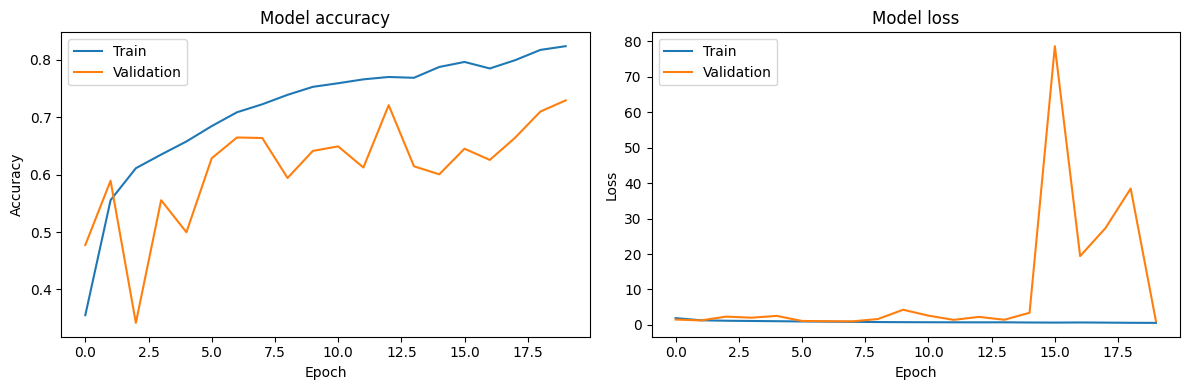

In [25]:
learning_curve(hist)